In [1]:
! pip install langchain langchain_community langgraph langchain_groq langchain_huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.29
    Uninstalling langchain-core-0.3.29:
      Successfully uninstalled langchain-core-0.3.29
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.14
    Uninstalling langchain-0.3.14:
      Successfully uninstalled langchain-0.3.14


In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
from typing import Annotated, Literal, Sequence, TypedDict
from langchain import hub
from langchain_core.messages import HumanMessage, BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langgraph.graph.message import add_messages
from langgraph.prebuilt import tools_condition
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.tools.retriever import create_retriever_tool
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
import os
from google.colab import userdata

os.environ['SERPER_API_KEY'] = userdata.get('SERPER_API_KEY')
os.environ['TAVILY_API_KEY'] = userdata.get('TAVILY_API_KEY')
os.environ['GROQ_API_KEY'] = userdata.get('GROQ_API_KEY')

In [5]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

from langchain_groq import ChatGroq
llm = ChatGroq(model_name="Gemma2-9b-It")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
llm.invoke("Hi").content

'Hi there! 👋  What can I do for you today? 😄\n'

In [7]:
url= "https://lilianweng.github.io/posts/2023-06-23-agent/"

In [8]:
WebBaseLoader(url).load()

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [9]:
WebBaseLoader(url).load()[0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
 'title': "LLM Powered Autonomous Agents | Lil'Log",
 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\

In [10]:
WebBaseLoader(url).load()[0].metadata["description"]

'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model 

In [11]:
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
]

In [12]:
docs = [WebBaseLoader(url).load() for url in urls]

In [13]:
docs

[[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final res

In [14]:
len(docs)

2

In [15]:
doc_list = [link for splitdoc in docs for link in splitdoc]

In [16]:
doc_list

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [17]:
! pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.8 MB/s eta 0:00:00


In [18]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100, chunk_overlap=25)

In [19]:
doc_splits = text_splitter.split_documents(doc_list)

In [20]:
doc_splits

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [21]:
len(doc_splits)

284

In [22]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00
 

In [23]:
vectordb = Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag",
    embedding=embeddings
)

In [24]:
retriever = vectordb.as_retriever()

In [25]:
retriever_tool = create_retriever_tool(
    retriever,
    name="retrieve_blog_posts",
    description="Search and return information about Lilian Weng posts on LLM agents, prompt engineering, and adversal attacks on LLMs. You are a specialized assistant. Use the 'retriever_tool' **only** when \
    the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello' or 'how are you', provide a normal response."
)

In [26]:
tools = [retriever_tool]

In [27]:
retrieve = ToolNode([retriever_tool])

In [28]:
class AgentState(TypedDict):
  messages: Annotated[Sequence[BaseMessage], add_messages]

In [29]:
def ai_assistant(state: AgentState):
  print("---CALL AGENT---")
  messages = state['messages']

  if len(messages) > 1:
    last_message = messages[-1]
    question = last_message.content

    prompt = PromptTemplate(
        template="""You are a helpful assistant whatever question has been asked to find our that in the given question and answer..
                  Here is the question: {question}
        """,

        input_variables = ['question']
    )

    chain = prompt | llm

    response = chain.invoke({"question": question})
    return {"messages": [response]}

  else:
    llm_with_tool = llm.bind_tools(tools)
    response = llm_with_tool.invoke(messages)
    return {"messages": [response]}

In [30]:
class grade(BaseModel):
  binary_score: str = Field(description="Relevance score 'yes' or 'no'")

In [31]:
def grade_documents(state: AgentState) -> Literal["Output_Generator", "Query_Rewriter"]:
  print("---GRADE DOCUMENT---")
  llm_with_structured_op = llm.with_structured_output(grade)

  prompt = PromptTemplate(
      template = """You are a grader deciding if a document is relevant to a user's question.
      Here is the document: {context}
      Here is the user's question: {question}
      If the document talks about or contains information related to the user's question, mark it as relevant.
      Give a 'yes' or 'no' answer to show if the document is relevant to the question.
      """,
      input_variables = ["context", "question"]
  )
  chain = prompt | llm_with_structured_op

  messages = state['messages']
  last_message = messages[-1]
  question = messages[0].content
  docs = last_message.content

  scored_result = chain.invoke({"question": question, "context": docs})
  score = scored_result.binary_score

  if score == 'yes':
    print("---DECISION: DOCS RELEVANT---")
    return "generator"
  else:
    print("---DECISION: DOCS NOT RELEVANT---")
    return "rewrite"

In [32]:
hub.pull("rlm/rag-prompt").pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [33]:
def generate(state: AgentState):
  print("---GENERATE---")
  messages = state['messages']

  question = messages[0].content

  last_message = messages[-1]
  docs = last_message.content

  prompt = hub.pull("rlm/rag-prompt")

  rag_chain = prompt | llm

  response = rag_chain.invoke({"context": docs, "question": question})
  print(f"this is my response: {response}")

  return {"messages": [response]}

In [34]:
from langchain_core.messages import HumanMessage

def rewrite(state: AgentState):
  print("---TRANSFORM QUERY---")
  messages = state['messages']
  question = messages[0].content

  message = [HumanMessage(content=f"""Look at the input and try to reason about the underlying semantic intent or meaning.
                  Here is the initial question: {question}
                  Formulate an improved question.""")
  ]

  response = llm.invoke(message)
  return {"messages": [response]}

In [35]:
workflow = StateGraph(AgentState)

workflow.add_node("My_Ai_Assistant", ai_assistant)
workflow.add_node("Vector_Retriever", retrieve)
workflow.add_node("Output_Generator", generate)
workflow.add_node("Query_Rewriter", rewrite)

In [36]:
workflow.add_edge(START, "My_Ai_Assistant")

In [37]:
workflow.add_conditional_edges(
    "My_Ai_Assistant",
    tools_condition,
    {
        "tools": "Vector_Retriever",
        END: END
    }
)

In [38]:
workflow.add_conditional_edges(
    "Vector_Retriever",
    grade_documents,
    {
        "generator": "Output_Generator",
        "rewrite": "Query_Rewriter"
    }
)

In [40]:
workflow.add_edge("Output_Generator", END)

In [41]:
workflow.add_edge("Query_Rewriter", "My_Ai_Assistant")

In [42]:
app = workflow.compile()

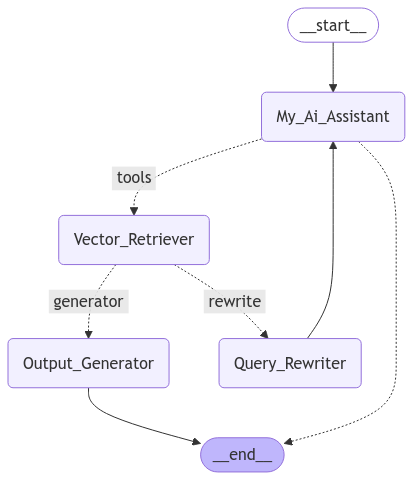

In [43]:
from IPython.display import Image, display

try:
  display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except Exception as e:
  pass

In [44]:
app.invoke({'messages':["what is autonomous Agent?"]})

---CALL AGENT---
---GRADE DOCUMENT---
---DECISION: DOCS RELEVANT---
---GENERATE---
this is my response: content='An autonomous agent is a system with an LLM at its core, designed to act independently.  It can plan, decompose tasks, and solve problems autonomously.  LLM-powered autonomous agents are exemplified by demos like AutoGPT and BabyAGI.  \n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 55, 'prompt_tokens': 295, 'total_tokens': 350, 'completion_time': 0.1, 'prompt_time': 0.015285779, 'queue_time': 0.020496551000000002, 'total_time': 0.115285779}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-44919f77-1890-4c4b-92b8-c43f5d547627-0' usage_metadata={'input_tokens': 295, 'output_tokens': 55, 'total_tokens': 350}


{'messages': [HumanMessage(content='what is autonomous Agent?', additional_kwargs={}, response_metadata={}, id='e8741f48-bb4f-4629-8318-0cc6cada9613'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_r6h6', 'function': {'arguments': '{"query":"What is an autonomous agent?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 1039, 'total_tokens': 1126, 'completion_time': 0.158181818, 'prompt_time': 0.0423929, 'queue_time': 0.01994113, 'total_time': 0.200574718}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-b9a795e9-a03c-4b2f-af0a-0da5f46a5b3b-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'What is an autonomous agent?'}, 'id': 'call_r6h6', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1039, 'output_tokens': 87, 'total_tokens': 1126}),
  ToolMessage(content='Fig. 1. Overview 

In [45]:
app.invoke({"messages":["what is a prompt engineering explain me in terms of agents and langchain?"]})

---CALL AGENT---
---GRADE DOCUMENT---
---DECISION: DOCS RELEVANT---
---GENERATE---
this is my response: content="In the context of LangChain, prompt engineering involves carefully crafting instructions or questions (prompts) given to a language model (agent) to elicit the desired response.  LangChain allows you to connect language models with other tools and data sources, making prompt engineering crucial for guiding the agent's interactions and achieving specific application goals.  Effective prompt engineering can significantly influence the quality and accuracy of the agent's outputs. \n" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 336, 'total_tokens': 424, 'completion_time': 0.16, 'prompt_time': 0.026404273, 'queue_time': 0.021470498000000005, 'total_time': 0.186404273}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-d6e0383d-cf99-4cc2-abb0-99fd50686d9d-0' 

{'messages': [HumanMessage(content='what is a prompt engineering explain me in terms of agents and langchain?', additional_kwargs={}, response_metadata={}, id='3565d3fe-6682-4c23-8a0b-bff4e878c657'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_tvky', 'function': {'arguments': '{"query":"Prompt engineering in LangChain"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 1049, 'total_tokens': 1137, 'completion_time': 0.16, 'prompt_time': 0.043449957, 'queue_time': 0.020729863, 'total_time': 0.203449957}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-68e60d87-5447-4839-9fae-4cb97c593668-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'Prompt engineering in LangChain'}, 'id': 'call_tvky', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1049, 'output_tokens': 88, 'total_tokens'

In [46]:
app.invoke({"messages":["what is capital of india?"]})

---CALL AGENT---
---GRADE DOCUMENT---
---DECISION: DOCS NOT RELEVANT---
---TRANSFORM QUERY---
---CALL AGENT---


{'messages': [HumanMessage(content='what is capital of india?', additional_kwargs={}, response_metadata={}, id='d4384a3f-0218-49d8-9830-1ad2651c9d4c'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8nga', 'function': {'arguments': '{"query":"What is the capital of India?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 1040, 'total_tokens': 1128, 'completion_time': 0.16, 'prompt_time': 0.03332555, 'queue_time': 0.02252228, 'total_time': 0.19332555}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-56aaebe6-b636-4844-b96f-18d7cf154267-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'What is the capital of India?'}, 'id': 'call_8nga', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1040, 'output_tokens': 88, 'total_tokens': 1128}),
  ToolMessage(content='Definition: Determine 